### Happiness Score Prediction

   The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
#df = pd.read_csv('https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv')
#df


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

This dataset contains input features such as 'Country', 'Region', 'Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' and target variable as 'Happiness Score', based on input features we predict Happiness score, since this target is continous data we consider this as regression problem.

Dystopia is an imaginary country that has the world’s least-happy people. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.shape

(158, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This dataset contains 158 rows and 12 columns, both numerical and categorical columns,  all the columns are continous data except the happiness rank , country and region columns. We also observe that there is no null values in any of the columns.But still we check using isnull method. 

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

since Country and region columns are interrelated and are also categorical data we can drop them as the country column is same as the rank column each contry has different rank so we will drop country and region

In [10]:
df.drop(['Country','Region'], axis = 1, inplace = True)
df


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### Data Visualization

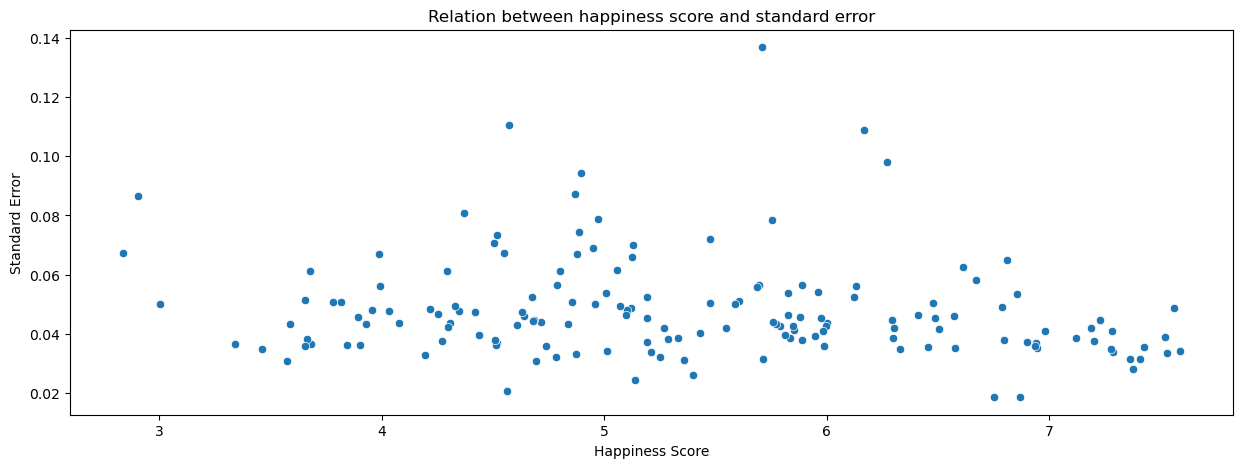

In [11]:
#plot between hapiness score and standard error
plt.figure(figsize =(15,5))
sns.scatterplot(x = df['Happiness Score'], y=df['Standard Error'])

plt.xlabel("Happiness Score")
plt.ylabel("Standard Error")
plt.title("Relation between happiness score and standard error")
plt.show()

we observe that there is no significant relation between happiness score and standard error we can see that all the countries standard error rate lie between 0.03 to 0.07. 

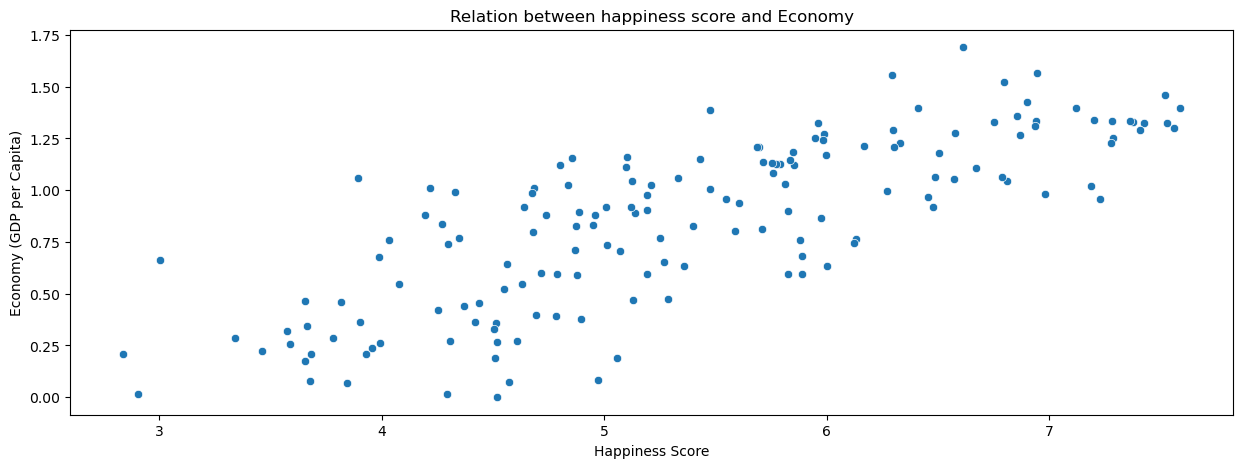

In [12]:
#plot between hapiness score and standard error
plt.figure(figsize =(15,5))
sns.scatterplot(x = df['Happiness Score'], y=df['Economy (GDP per Capita)'])


plt.xlabel("Happiness Score")
plt.ylabel("Economy (GDP per Capita)")
plt.title("Relation between happiness score and Economy")
plt.show()

we observe that as the economy increase the happiness score is also increasing. 

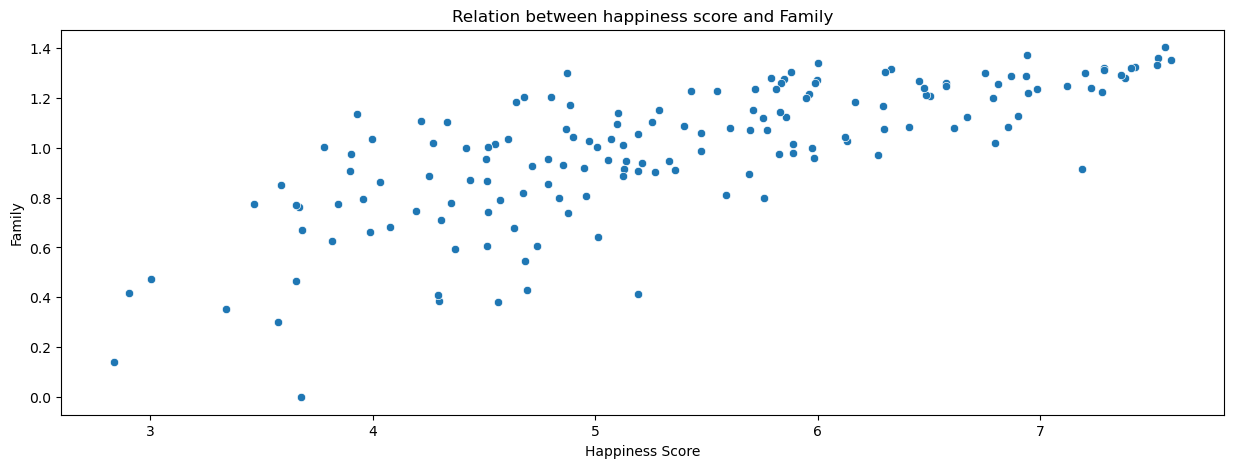

In [13]:
#plot between hapiness score and standard error
plt.figure(figsize =(15,5))
sns.scatterplot(x = df['Happiness Score'], y=df['Family'],)
plt.xlabel("Happiness Score")
plt.ylabel("Family")
plt.title("Relation between happiness score and Family")
plt.show()

we observe that as the families increases the happiness score is also increasing.

In [14]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We observe that 
1. counts of all the column are equal.
2. mean and standard deviation are normal so data is better.
3. mean values are slightly higher than the median values in columns like hapiness score, standard error, trust, generosity, dystopia so there may be slightly right skewness.
4. mean values are lesser than median values in columns like economy, family, health, freedom, so there may slight left skewness.
5. There is no such huge data differece between paercentiles and max value so there might not be any outliers.

lets check the data using visualization techniques

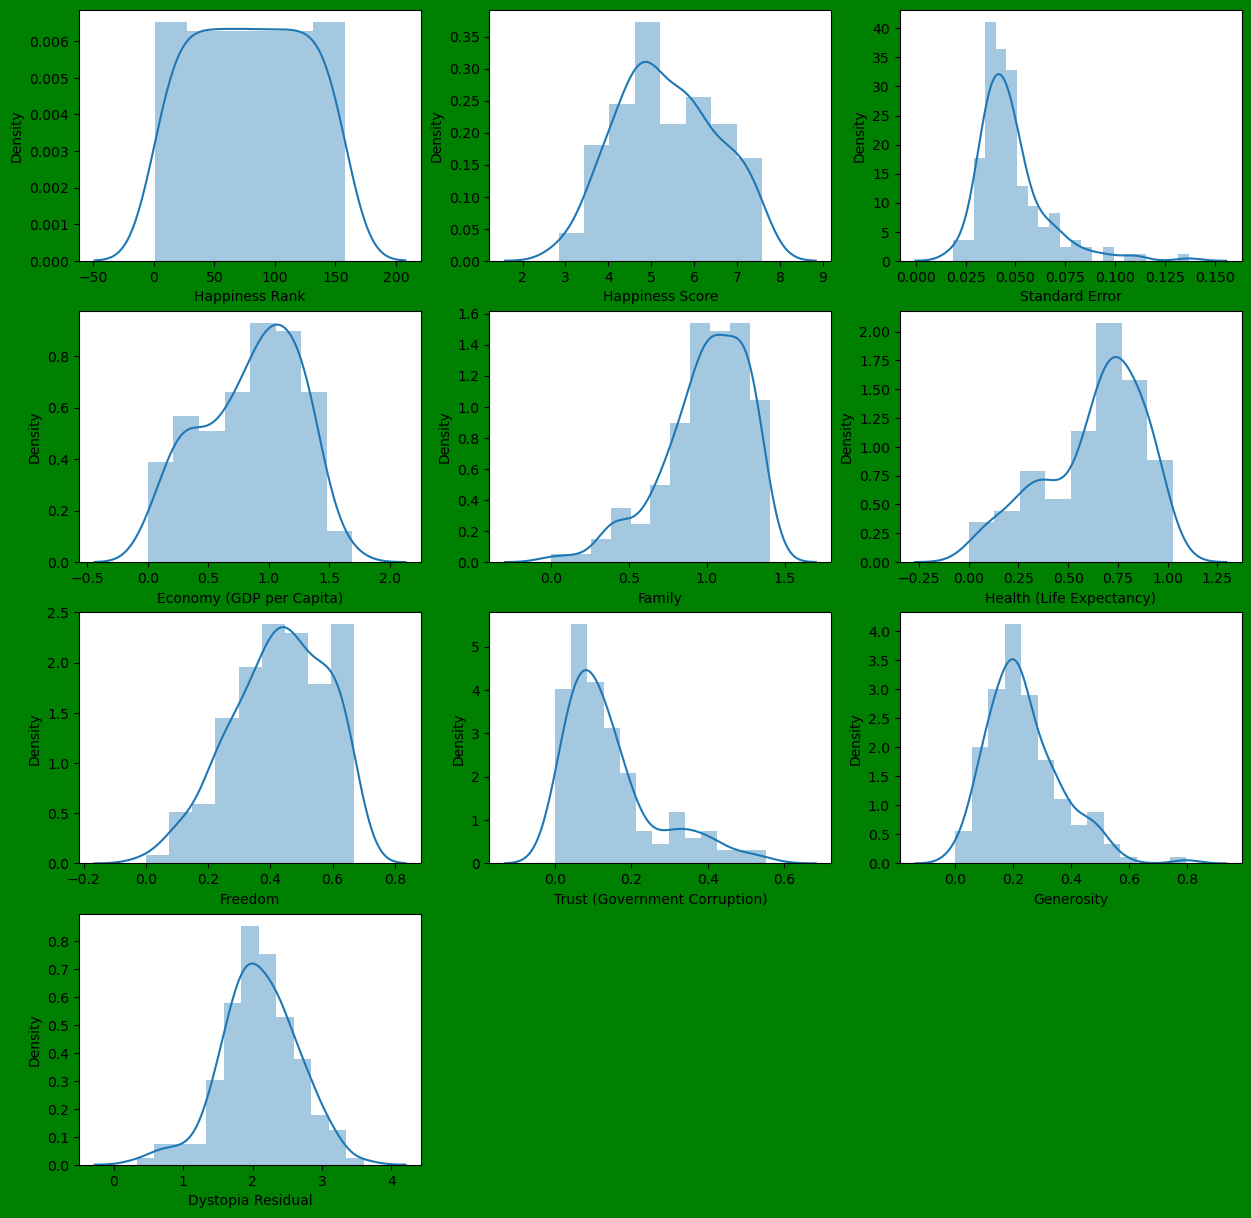

In [15]:
#visualize the data of each column

plt.figure(figsize =(15,15), facecolor = 'green')
num = 1
for column in df:
    if num <=10:
        ax = plt.subplot(4,3,num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()


We observe that 
1. in all the columns there is almost normal distribution. we dont see much skewness except generosity and standard error.
2. Hapiness score values are high from 4.5 to 5.5 and there is no much values after 7 and least score is from 2.8 to 3 
3. there may be highest standard error of 0.040 approximately.
4. economy is having high data ranging from 0.8 to 1.3.
5. Generosity is having very least values after 0.6 to 0.8.

In [16]:
df.corr().sum()

Happiness Rank                  -3.699454
Happiness Score                  3.750613
Standard Error                   0.020041
Economy (GDP per Capita)         2.947603
Family                           2.945391
Health (Life Expectancy)         2.762008
Freedom                          2.984069
Trust (Government Corruption)    2.342925
Generosity                       1.665859
Dystopia Residual                1.227988
dtype: float64

We observe that happiness rank is negatively correlated and all other columns are positively corelated with each other. standard error has the least correlation with features.

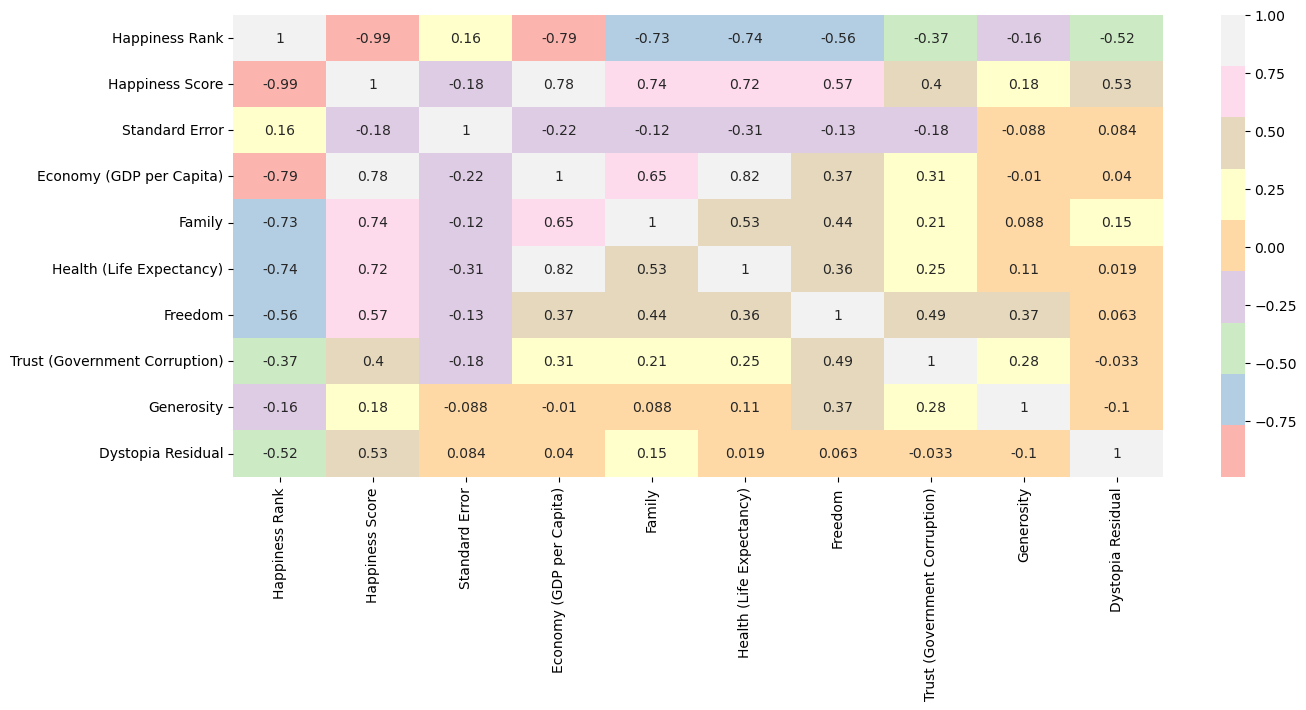

In [17]:
df_corr = df.corr()

plt.figure(figsize = (15,6))
sns.heatmap(df_corr,annot=True,annot_kws ={'size':10}, cmap = "Pastel1")
plt.show()

Here also we observe that features like Economy and health are highly correlated with each other and Economy is the only feature  having highest correlation with target.

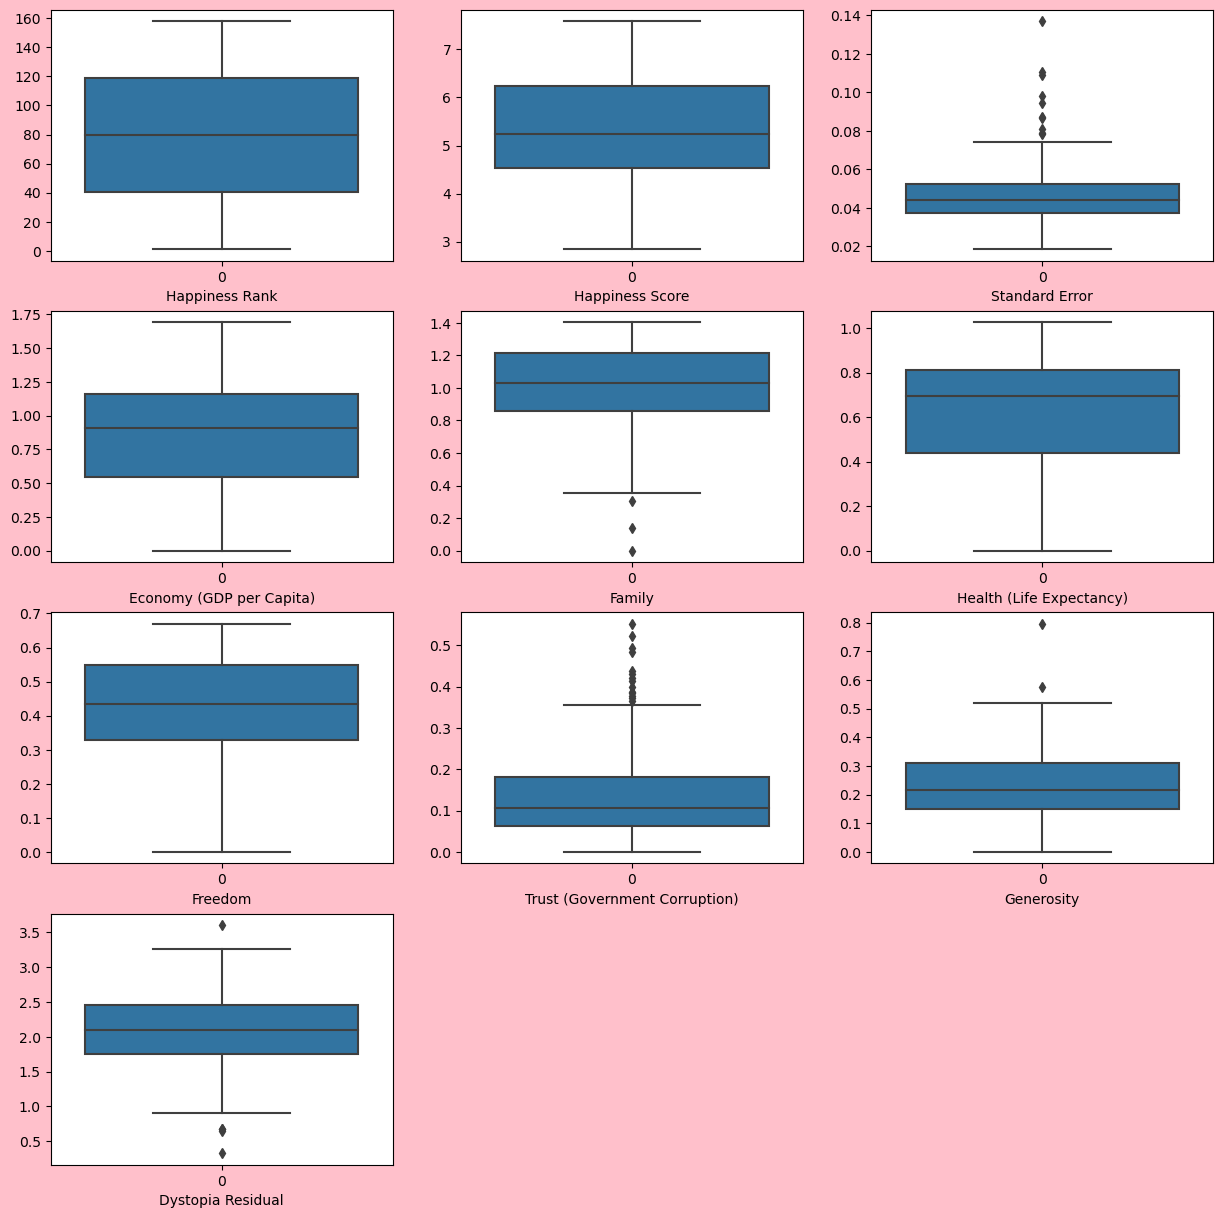

In [18]:
#check For Outliers
#plot BoxPlot
plt.figure(figsize =(15,15), facecolor = 'pink')
num = 1
for column in df:
    if num <=10:
        plt.subplot(4,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()


We observe that Standard Error, Trust, Generosity have upper outliers , Family has lower outlier, and Dystopia Residual has both upper and lower outliers. So we need to treat the outliers.

In [19]:
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3) #threshold = 3
z_df=df[(z<3).all(axis=1)]
z_df.shape

(149, 10)

In [20]:
print("data_loss =   ", ((df.shape[0]-z_df.shape[0])/df.shape[0])*100)

data_loss =    5.69620253164557


In [21]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]

In [22]:
iqr_df.shape

(126, 10)

In [23]:
print("data_loss =   ", ((df.shape[0]-iqr_df.shape[0])/df.shape[0])*100)

data_loss =    20.253164556962027


We are losing 5.6% of data using z-score method so we consider the dataframe by using z-score.

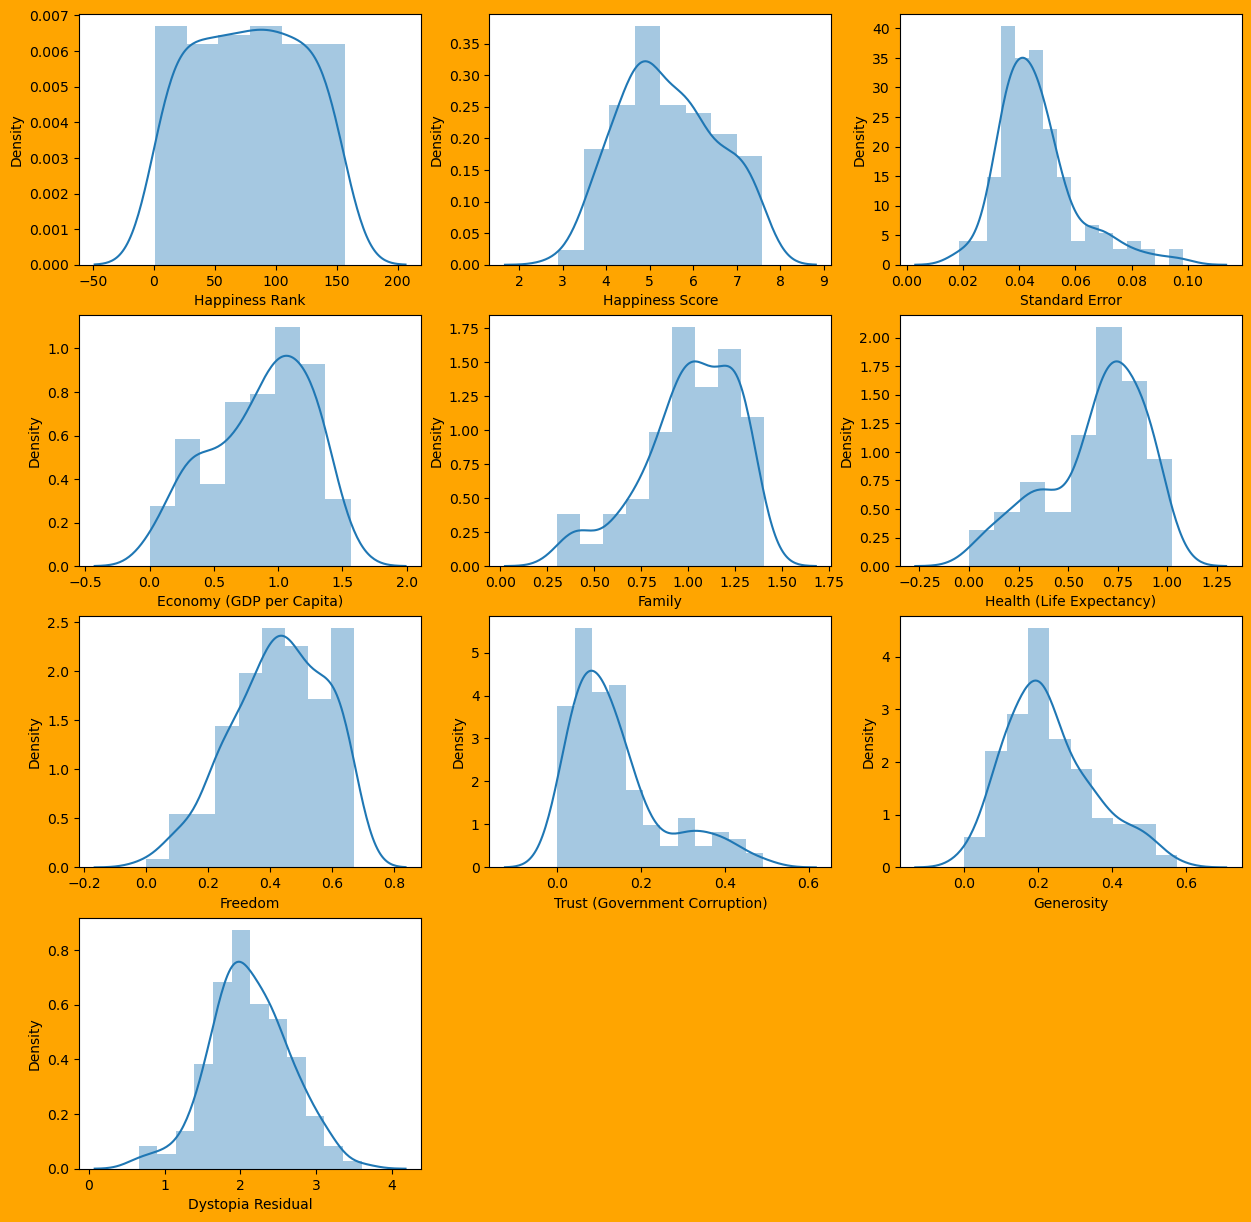

In [24]:
plt.figure(figsize =(15,15), facecolor = 'orange')
num = 1
for column in z_df:
    if num <=10:
        ax = plt.subplot(4,3,num)
        sns.distplot(z_df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

In [25]:
z_df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

we see there is skewness in standard error, Family, health, trust, generosity  

In [26]:
X = z_df.drop(columns = ['Happiness Score'])
y = z_df['Happiness Score']

In [27]:
X.shape

(149, 9)

In [28]:
y.shape

(149,)

In [29]:
# to remove skewness we use cbrt method 
for index in X.skew().index:
    if X.skew().loc[index] >0.55:
        X[index] = np.cbrt(X[index])

In [30]:
X.skew()

Happiness Rank                   0.003268
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.087392
Dystopia Residual               -0.021144
dtype: float64

We see still there are skewness in columns like Family, Health, Generosity. but we have reduced in some of the features. so next we will find the corr with features and target.

In [31]:
z_df.corr().sum()

Happiness Rank                  -3.780744
Happiness Score                  3.842458
Standard Error                  -0.177107
Economy (GDP per Capita)         2.960952
Family                           3.000058
Health (Life Expectancy)         2.771090
Freedom                          3.054802
Trust (Government Corruption)    2.644216
Generosity                       1.888306
Dystopia Residual                1.326024
dtype: float64

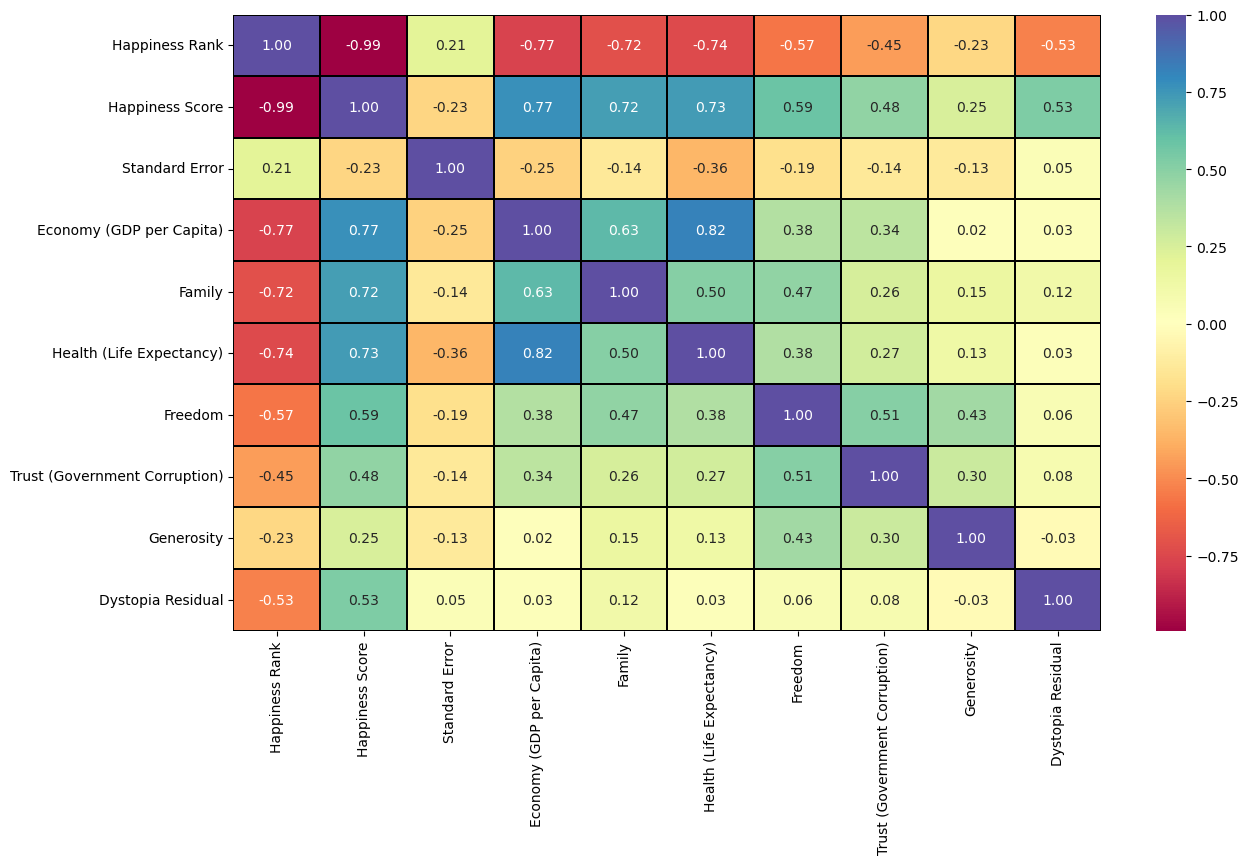

In [32]:
plt.figure(figsize = (14,8))
sns.heatmap(z_df.corr(), linewidths = 0.1, fmt = '0.2f', linecolor = "Black", annot=True, cmap = "Spectral")
plt.show()

Here we dont see much correlation of features with target except economy since it has 0.77% correlated with target Happiness Score. And also, Health and Economy both features have correlation same as 0.82 but not too high correlation.

#### Standard Scalar

In [33]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
X_sr = pd.DataFrame(sr.fit_transform(X), columns = X.columns)
X_sr

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.713905,-0.911097,1.381916,1.357879,1.235390,1.583704,1.886835,0.620101,0.756876
1,-1.691535,0.289534,1.138324,1.567882,1.261541,1.338953,0.279412,1.374255,1.109300
2,-1.669166,-0.988343,1.198220,1.401974,0.962900,1.476027,2.142033,0.883029,0.708507
3,-1.646796,-0.496623,1.543526,1.283947,1.006023,1.611371,1.646273,0.914382,0.657485
4,-1.624427,-0.781797,1.200315,1.250726,1.089333,1.366887,1.477326,1.476816,0.631620
...,...,...,...,...,...,...,...,...,...
144,1.641542,0.473095,-1.026255,-0.945943,-1.985941,0.274090,0.581308,-0.044953,-1.343100
145,1.663911,-0.134003,-1.562163,-0.624365,-1.498813,-0.216276,0.161899,0.078376,-1.252030
146,1.686281,-1.223140,-1.402596,-2.811354,-1.367851,-1.285662,-0.153050,1.013522,-0.322135
147,1.731020,-0.690149,-1.488379,-2.608163,-1.303594,0.379439,-0.355660,-0.202346,-0.930702


In [34]:
# Now we will check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:

vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X_sr.values, i) for i in range(len(X_sr.columns))]
vif['Features'] = X_sr.columns

vif

,VIF Values,Features
0,74.790660,Happiness Rank
1,1.168376,Standard Error
2,12.671383,Economy (GDP per Capita)
3,6.038971,Family
4,8.634624,Health (Life Expectancy)
5,3.404111,Freedom
6,1.695376,Trust (Government Corruption)
7,1.915711,Generosity
8,17.360561,Dystopia Residual


We see that Happiness Rank, Economy, Dystopia Residual are having high vif value. but Happiness Rank is having very high value compared to other two features, so we will drop Happiness Rank and again check for vif value

In [36]:
#drop Happiness Rank
X_sr.drop('Happiness Rank', axis=1, inplace=True)

In [37]:
#check for milticollinearity again
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X_sr.values, i) for i in range(len(X_sr.columns))]
vif['Features'] = X_sr.columns

vif

,VIF Values,Features
0,1.155467,Standard Error
1,4.140513,Economy (GDP per Capita)
2,1.943149,Family
3,3.394236,Health (Life Expectancy)
4,1.964989,Freedom
5,1.390700,Trust (Government Corruption)
6,1.348086,Generosity
7,1.036059,Dystopia Residual


So, Now we have removed Multicollinearity and next we need to build model.

### Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score


In [39]:
accuracy = 0
r_state =0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_sr, y, test_size = 0.25, random_state = i)
    #X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    acc = r2_score(y_test,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("max r2 score is ", accuracy , "randomstate = ",r_state)

max r2 score is  0.9991422834847878 randomstate =  77


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_sr, y, test_size = 0.30, random_state = r_state)

In [41]:
X_train.shape

(104, 8)

In [42]:
X_test.shape

(45, 8)

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
print("Linear Regression")
print("r2Score of train data is  ",r2_score(y_train, lr_pred_train))
lr_r2 = r2_score(y_test, lr_pred)
print("r2Score of test data is  ",lr_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, lr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, lr_pred))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print("Root Mean squared error of test data is  ", lr_rmse)
print("\n\n")


ls = Lasso()
ls.fit(X_train,y_train)
ls_pred = ls.predict(X_test)
ls_pred_train = ls.predict(X_train)
print("Lasso Regression")
print("r2Score of train data is  ",r2_score(y_train, ls_pred_train))
ls_r2 = r2_score(y_test, ls_pred)
print("r2Score of test data is  ", ls_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, ls_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, ls_pred))
ls_rmse = np.sqrt(mean_squared_error(y_test, ls_pred))
print("Root Mean squared error of test data is  ", ls_rmse)
print("\n\n")

rge = Ridge()
rge.fit(X_train,y_train)
rge_pred = rge.predict(X_test)
rge_pred_train = rge.predict(X_train)
print("Ridge Regression")
print("r2Score of train data is  ",r2_score(y_train, rge_pred_train))
rge_r2 = r2_score(y_test, rge_pred)
print("r2Score of test data is  ", rge_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, rge_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, rge_pred))
rge_rmse = np.sqrt(mean_squared_error(y_test, rge_pred))
print("Root Mean squared error of test data is  ", rge_rmse)
print("\n\n")

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_pred = gbr.predict(X_test)
gbr_pred_train = gbr.predict(X_train)
print("Gradient Boosting Regression ")
print("r2Score of train data is  ",r2_score(y_train, gbr_pred_train))
gbr_r2 = r2_score(y_test, gbr_pred)
print("r2Score of test data is  ", gbr_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, gbr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, gbr_pred))
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
print("Root Mean squared error of test data is  ", gbr_rmse)
print("\n\n")

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)
rfr_pred_train = rfr.predict(X_train)
print("Random Forest Regression ")
print("r2Score of train data is  ",r2_score(y_train, rfr_pred_train))
rfr_r2 = r2_score(y_test, rfr_pred)
print("r2Score of test data is  ", rfr_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, rfr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, rfr_pred))
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print("Root Mean squared error of test data is  ", rfr_rmse)
print("\n\n")

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred_train = dtr.predict(X_train)
print("Decision Tree Regression ")
print("r2Score of train data is  ",r2_score(y_train, dtr_pred_train))
dtr_r2 = r2_score(y_test, dtr_pred)
print("r2Score of test data is  ", dtr_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, dtr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, dtr_pred))
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
print("Root Mean squared error of test data is  ", dtr_rmse)
print("\n\n")

knn = KNN()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_pred_train = knn.predict(X_train)
print("K-Nearest Neighbors Regression ")
print("r2Score of train data is  ",r2_score(y_train, knn_pred_train))
knn_r2 = r2_score(y_test, knn_pred)
print("r2Score of test data is  ", knn_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, knn_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, knn_pred))
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
print("Root Mean squared error of test data is  ", knn_rmse)
print("\n\n")

svr = SVR()
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
svr_pred_train = svr.predict(X_train)
print("Super Vector Regression ")
print("r2Score of train data is  ",r2_score(y_train, svr_pred_train))
svr_r2 = r2_score(y_test, svr_pred)
print("r2Score of test data is  ", svr_r2)
print("Mean absolute error of test data is  ", mean_absolute_error(y_test, svr_pred))
print("Mean squared error of test data is  ", mean_squared_error(y_test, svr_pred))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
print("Root Mean squared error of test data is  ", svr_rmse)
print("\n\n")

Linear Regression
r2Score of train data is   0.9960431933240244
r2Score of test data is   0.9988323081548037
Mean absolute error of test data is   0.030280523862146264
Mean squared error of test data is   0.0014222262996630621
Root Mean squared error of test data is   0.03771241572298256



Lasso Regression
r2Score of train data is   0.0
r2Score of test data is   -0.07451618589677977
Mean absolute error of test data is   0.9622611111111109
Mean squared error of test data is   1.3087401314677838
Root Mean squared error of test data is   1.144001805710019



Ridge Regression
r2Score of train data is   0.9960059429753977
r2Score of test data is   0.9988054460140868
Mean absolute error of test data is   0.030069670886492154
Mean squared error of test data is   0.001454943872497061
Root Mean squared error of test data is   0.038143726515602286



Gradient Boosting Regression 
r2Score of train data is   0.9995235883651346
r2Score of test data is   0.9168235224346205
Mean absolute error of te

In [44]:
final_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','RandomForest','DecisionTree', 'Knn','svr'],
                          'r-square_Scores':[lr_r2, ls_r2,rge_r2,gbr_r2,rfr_r2, dtr_r2,knn_r2,svr_r2],
                          'rmse_score':[lr_rmse, ls_rmse,rge_rmse,gbr_rmse,rfr_rmse, dtr_rmse,knn_rmse,svr_rmse]})
final_data


,Models,r-square_Scores,rmse_score
0,Linear,0.998832,0.037712
1,Lasso,-0.074516,1.144002
2,Ridge,0.998805,0.038144
3,GradientBoosting,0.916824,0.318288
4,RandomForest,0.883750,0.376285
5,DecisionTree,0.806340,0.485669
6,Knn,0.878527,0.384646
7,svr,0.907262,0.336085


From the above dataframe we observe that Linear regression and ridge regression are giving same r2 scores but we see that linear regression is having very less rmse compared to ridge regression, so we consider <b>linear regression</b> as best model

#### Cross_Validation Score

In [45]:
print("Linear Regression Model")
lr_score = cross_val_score(lr, X_sr, y, cv=5, scoring ='r2')
print(lr_score)
print(np.mean(lr_score))
lr_diff = (lr_r2 - lr_score.mean())*100
print(lr_diff)
print("\n")

print("Lasso Regression Model")
ls_score = cross_val_score(ls, X_sr, y, cv=5, scoring ='r2')
print(ls_score)
print(np.mean(ls_score))
ls_diff = (ls_r2 - ls_score.mean())*100
print(ls_diff)
print("\n")

print("Ridge Regression Model")
rge_score = cross_val_score(rge, X_sr, y, cv=5, scoring ='r2')
print(rge_score)
print(np.mean(rge_score))
rge_diff = (rge_r2 - rge_score.mean())*100
print(rge_diff)
print("\n")

print("Gradient Boosting Regression Model")
gbr_score = cross_val_score(gbr, X_sr, y, cv=5, scoring ='r2')
print(gbr_score)
print(np.mean(gbr_score))
gbr_diff = (gbr_r2 - gbr_score.mean())*100
print(gbr_diff)
print("\n")


print("Random Forest Regression Model")
rfr_score = cross_val_score(rfr, X_sr, y, cv=5, scoring ='r2')
print(rfr_score)
print(np.mean(rfr_score))
rfr_diff = (rfr_r2 - rfr_score.mean())*100
print(rfr_diff)
print("\n")

print("Decision Tree Regression Model")
dtr_score = cross_val_score(dtr, X_sr, y, cv=5, scoring ='r2')
print(dtr_score)
print(np.mean(dtr_score))
dtr_diff = (dtr_r2 - dtr_score.mean())*100
print(dtr_diff)
print("\n")

print("K-Nearest Neighbors Regression Model")
knn_score = cross_val_score(knn, X_sr, y, cv=5, scoring ='r2')
print(knn_score)
print(np.mean(knn_score))
knn_diff = (knn_r2 - knn_score.mean())*100
print(knn_diff)
print("\n")

print("Super Vector Regression Model")
svr_score = cross_val_score(svr, X_sr, y, cv=5, scoring ='r2')
print(svr_score)
print(np.mean(svr_score))
svr_diff = (svr_r2 - svr_score.mean())*100
print(svr_diff)
print("\n")

Linear Regression Model
[0.89128888 0.94328682 0.84987104 0.66976278 0.98779967]
0.8684018388899493
13.043046926485447


Lasso Regression Model
[-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
-23.099531692553747
2302.501550665697


Ridge Regression Model
[0.86182738 0.9453794  0.84998169 0.67508442 0.98444683]
0.8633439440173774
13.546150199670947


Gradient Boosting Regression Model
[-4.45193295  0.02641096 -0.54442372 -3.14737037 -3.93938326]
-2.411339866824666
332.8163389259287


Random Forest Regression Model
[-7.39975249 -0.90670753 -0.43259237 -1.64861948 -6.2797892 ]
-3.3334922139685927
421.72418892088785


Decision Tree Regression Model
[ -6.05117535  -7.45631662  -6.65788958 -10.58635102  -5.40118557]
-7.230583627053098
803.6923657432703


K-Nearest Neighbors Regression Model
[-8.65194832 -2.67287385 -1.76161147 -5.86196519 -5.8679538 ]
-4.963270524955244
584.1797126851446


Super Vector Regression Model
[-9.57892585  0.23360689  0.77002602 -0.36027913 -5.36

In [46]:
Cross_val_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','RandomForest','DecisionTree', 'Knn','svr'],
                          'Cross_val_scores':[lr_diff, ls_diff,rge_diff,gbr_diff,rfr_diff, dtr_diff,knn_diff,svr_diff]})
Cross_val_data

,Models,Cross_val_scores
0,Linear,13.043047
1,Lasso,2302.501551
2,Ridge,13.546150
3,GradientBoosting,332.816339
4,RandomForest,421.724189
5,DecisionTree,803.692366
6,Knn,584.179713
7,svr,376.729990


Here also we observe that Linear regression model is having very less cross validation score compared to any other model. So we consider <b>linear regression model</b> is best as its r2 score is also 99.8% and since we are getting almost 99% score we dont need to tune the parameters also.
Next we will save the model

#### save the model

In [47]:
import joblib
joblib.dump(lr,"Happiness_score.pkl")

['Happiness_score.pkl']

In [48]:
#predicting 
model = joblib.load("Happiness_score.pkl")
result = model.score(X_test,y_test)
print(result)

0.9988323081548037


In [49]:
#create dataframe comparing 
comparision = pd.DataFrame([model.predict(X_test)[:20],y_test[:20]],index=['Predicted','Actual'])
comparision

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Predicted,5.080066,4.360033,4.565517,4.87367,7.369344,4.423921,4.261222,3.678218,6.4137,4.926488,7.218797,4.38941,6.694674,7.141033,5.867749,4.824586,4.006394,3.796809,7.3122,5.470694
Actual,5.124000,4.332000,4.550000,4.89800,7.406000,4.518000,4.252000,3.667000,6.4110,4.885000,7.187000,4.41900,6.670000,7.119000,5.889000,4.786000,3.989000,3.819000,7.3780,5.477000


#### We see actual and predicted values are almost same, so we consider Linear Regression Model as the best and accurate model.

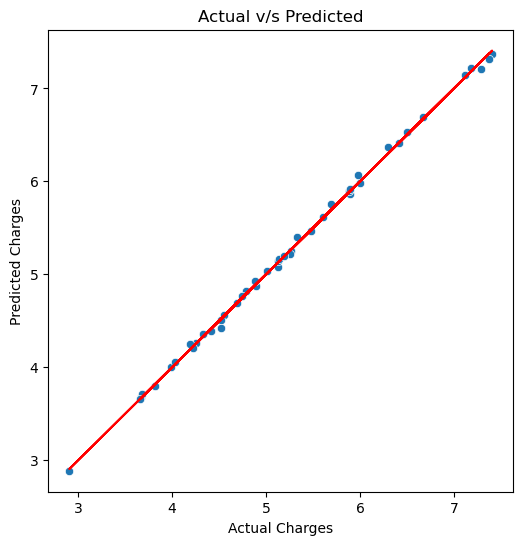

In [50]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr_pred)
plt.plot(y_test,y_test,color = 'red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual v/s Predicted')
plt.show()

we see that for all the points the predicted values and actual values are meeting slightly and there is no huge difference so we consider Linear Regression Model.